In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:33359 Dashboard: /proxy/45555/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')

In [11]:
variable='aice_m'
expt = '01deg_jra55v13_ryf9091'
var = cc.querying.getvar(expt,variable,session,start_time='2099-01-01')

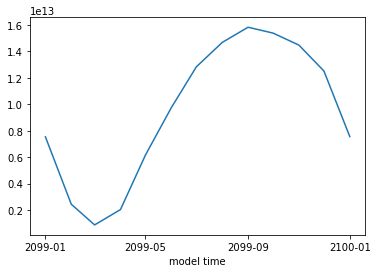

In [12]:
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t
area_zonalsum = area.sum('xt_ocean')
SH_area = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
SH_area.plot()